# **GPLearn**

In [25]:
!pip install gplearn

from gplearn.genetic import SymbolicRegressor
import numpy as np
import matplotlib.pyplot as plt


In [26]:
# Generate sample data
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**3 + X**2 - X + np.random.normal(0, 0.1, size=X.shape)

# Train symbolic regression model
model_gp = SymbolicRegressor(
    population_size=1000,
    generations=20,
    stopping_criteria=0.01,
    function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'sin', 'cos'),
    p_crossover=0.7,
    p_point_mutation=0.2,
    verbose=1
)

model_gp.fit(X, y.ravel())



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    16.23          3.27077        7           0.1631              N/A     59.47s
   1    11.65         0.544056        7           0.1631              N/A     50.29s
   2    11.11         0.498811        9         0.101725              N/A     36.20s
   3     9.31         0.393017       10        0.0919321              N/A     21.37s
   4    10.72         0.393624       13         0.090068              N/A     22.76s
   5    11.49         0.392738       16        0.0822426              N/A     26.48s
   6    10.67         0.372013       16        0.0822426              N/A     51.38s
   7    11.05         0.346181       16        0.0822426              N/A     27.26s
   8    13.12          0.44609       16        0.0822426              N/A  

SymbolicRegressor(function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'sin', 'cos'),
                  p_crossover=0.7, p_point_mutation=0.2, stopping_criteria=0.01,
                  verbose=1)

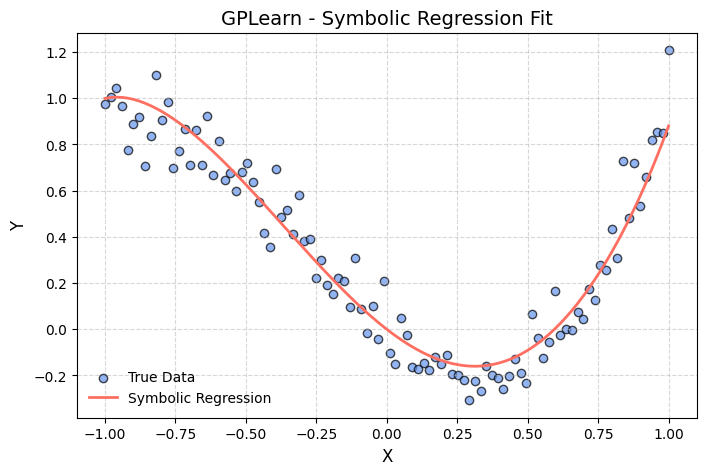

In [27]:
import matplotlib.pyplot as plt

# Make predictions
y_pred = model_gp.predict(X)

true_data_color = "#6495ED"
prediction_color = "#FF6F61"

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="True Data", color=true_data_color, alpha=0.7, edgecolors="k")
plt.plot(X, y_pred, label="Symbolic Regression", color=prediction_color, linewidth=2)
plt.legend(frameon=False)
plt.grid(True, linestyle="--", alpha=0.5)
plt.title("GPLearn - Symbolic Regression Fit", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.show()

In [28]:
print(model_gp._program)

mul(add(sqrt(log(cos(mul(X0, X0)))), add(-0.848, X0)), div(sin(X0), cos(0.462)))


# **PySR**

In [29]:
!pip install pysr

from pysr import PySRRegressor
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Generate sample data
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**3 + X**2 - X + np.random.normal(0, 0.1, size=X.shape)

model_pysr = PySRRegressor(
    niterations=100,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=["exp", "log", 'sqrt','sin', 'cos'],
)
model_pysr.fit(X, y)
print(model_pysr)

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2774: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 2.390e+04
Progress: 145 / 3100 total iterations (4.677%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.687e-01  1.594e+01  y = 0.34854
3           8.914e-02  3.191e-01  y = x₀ * x₀
4           8.767e-02  1.660e-02  y = 0.3324 / exp(x₀)
5           3.041e-02  1.059e+00  y = x₀ * (x₀ + -0.41558)
6           2.511e-02  1.916e-01  y = sin((x₀ + -0.52696) * x₀)
7           1.330e-02  6.357e-01  y = sin(cos(0.25036 - x₀) / 0.30532)
9           8.119e-03  2.466e-01  y = (((x₀ * x₀) + x₀) + -1.0276) * x₀
23          8.012e-03  9.454e-04  y = sin(((x₀ - (x₀ + x₀)) - x₀) * sin(cos(exp(x₀ - sin((x₀...
                                       * 0.20778) / 0.74415))))) + sin(0.020064)
24          7.996e-03  1.955e-03  y = sin(((x₀ - (x₀ + x₀)) - x₀) * sin(co

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.687e-01  1.594e+01  y = 0.34854
3           8.914e-02  3.191e-01  y = x₀ * x₀
4           8.767e-02  1.660e-02  y = 0.3324 / exp(x₀)
5           3.041e-02  1.059e+00  y = (x₀ + -0.41556) * x₀
6           1.703e-02  5.797e-01  y = x₀ * (exp(x₀) + -1.7407)
7           9.686e-03  5.644e-01  y = sin((exp(x₀) + -1.8626) * x₀)
9           7.921e-03  1.006e-01  y = sin((exp(x₀ * 1.0997) + -1.9815) * x₀)
11          7.758e-03  1.037e-02  y = sin((x₀ - 0.019935) * (exp(x₀ * 1.0902) + -1.9546))
13          7.564e-03  1.267e-02  y = (((x₀ + -1.011) + (x₀ * x₀)) * (x₀ - 0.03301)) * 0.962...
                                      08
14          7.554e-03  1.387e-03  y = sin((((x₀ + -1.0507) + (x₀ * x₀)) * x₀) - 0.36416) + 0...
                                      .37381
16          7.516e-03  2.523e-03  y = (sin((x₀ * (x₀ + ((x₀ * x₀) + -1.0589

In [31]:
print(model_pysr.equations_)

    complexity      loss                                           equation  \
0            1  0.168744                                          0.3485351   
1            3  0.089140                                            x0 * x0   
2            4  0.087672                               0.33240035 / exp(x0)   
3            5  0.030409                             (x0 + -0.4155643) * x0   
4            6  0.017031                        x0 * (exp(x0) + -1.7406551)   
5            7  0.009686                   sin((exp(x0) + -1.8625832) * x0)   
6            9  0.007921       sin((exp(x0 * 1.0996741) + -1.9814779) * x0)   
7           11  0.007758  sin((x0 - 0.01993532) * (exp(x0 * 1.0902084) +...   
8           13  0.007564  (((x0 + -1.0109968) + (x0 * x0)) * (x0 - 0.033...   
9           14  0.007554  sin((((x0 + -1.0507448) + (x0 * x0)) * x0) - 0...   
10          16  0.007516  (sin((x0 * (x0 + ((x0 * x0) + -1.0588864))) - ...   
11          21  0.007406  (x0 * x0) + (((x0 * (-1.02

In [32]:
best_eq = model_pysr.get_best()
print(f"Best equation: {best_eq}")

Best equation: complexity                                                    7
loss                                                   0.009686
equation                       sin((exp(x0) + -1.8625832) * x0)
score                                                  0.564399
sympy_format                      sin(x0*(exp(x0) - 1.8625832))
lambda_format    PySRFunction(X=>sin(x0*(exp(x0) - 1.8625832)))
Name: 5, dtype: object


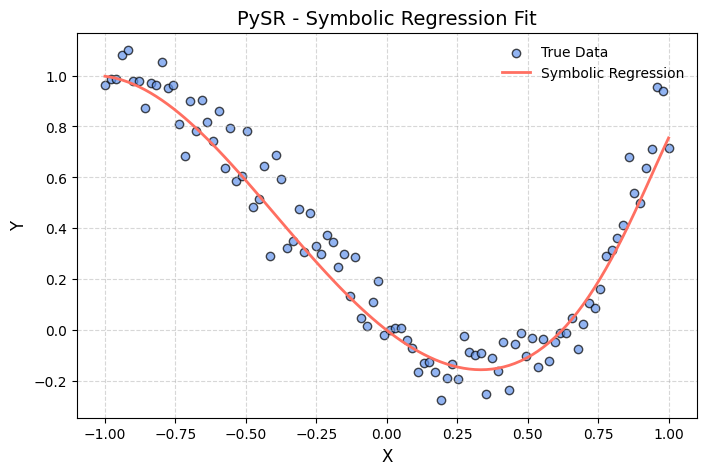

In [33]:
import matplotlib.pyplot as plt

# Make predictions
y_pred = model_pysr.predict(X)

true_data_color = "#6495ED"
prediction_color = "#FF6F61"

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="True Data", color=true_data_color, alpha=0.7, edgecolors="k")
plt.plot(X, y_pred, label="Symbolic Regression", color=prediction_color, linewidth=2)
plt.legend(frameon=False)
plt.grid(True, linestyle="--", alpha=0.5)
plt.title("PySR - Symbolic Regression Fit", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.show()